In [23]:
import os
import numpy as np
import skimage.io as io
import skimage.transform as transform
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2
%matplotlib inline

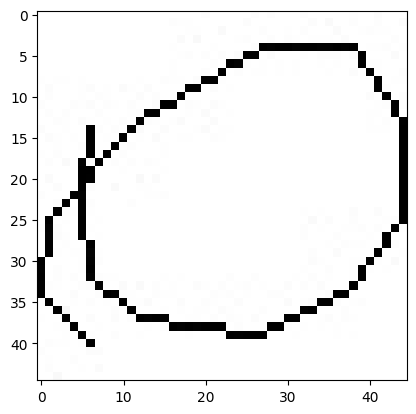

In [24]:
# Read the image
I = cv2.imread('0_49.jpg')
plt.imshow(I[...,::-1])

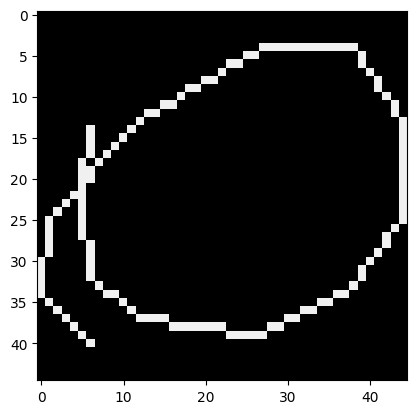

In [25]:
# Cut out the foreground layer
foreground = I.copy()
foreground[foreground<=5] = 240 # swap black and white colour channels
foreground[foreground>240] = 0 # Setting surrounding pixels to zero
plt.imshow(foreground)

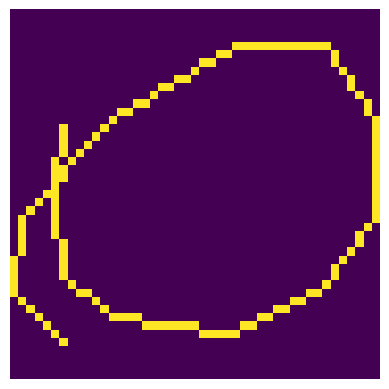

In [27]:
# Create a mask for this new foreground object
def getForegroundMask(foreground):
    mask_new = foreground.copy()[:,:,0]
    mask_new[mask_new>0] = 1
    return mask_new

mask_new = getForegroundMask(foreground)
plt.imshow(mask_new)
plt.axis('off')
plt.show()

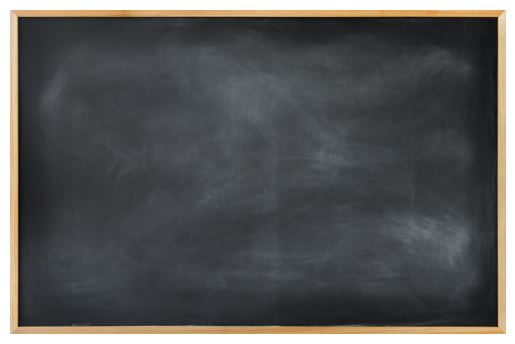

In [32]:
blackboard = cv2.imread('empty-blackboard.jpg')
plt.imshow(blackboard[...,::-1]) #swap colour channels
plt.axis('off')
plt.show()

In [36]:
blackboard.shape

(3302, 5052, 3)

In [37]:
foreground.shape

(45, 45, 3)

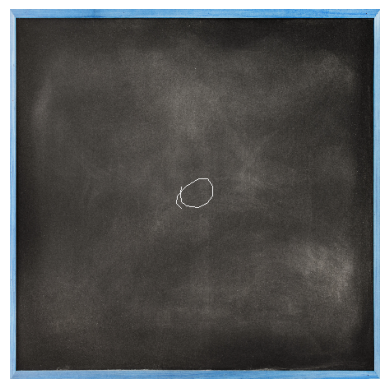

In [69]:
def compose(foreground, mask, background):
    #resize background
    background = cv2.resize(background, (450,450))
    background = cv2.cvtColor(background, cv2.COLOR_RGB2RGBA)
    foreground = cv2.cvtColor(foreground, cv2.COLOR_RGB2RGBA)
    foreground[:, :, 3] = mask
    alpha_l = 1.0 - mask
    # compute xoff and yoff for placement of upper left corner of resized image
    h, w, _ = foreground.shape
    hh, ww, _ = background.shape
    yoff = round((hh-h)/2)
    xoff = round((ww-w)/2)
    # todo: instead of choosing middle, choose random position (within bounds)
    # use numpy indexing to place the resized image in the center of background image
    result = background.copy()
    for c in range(0,3):
        result[yoff:yoff+h, xoff:xoff+w, c] = (mask * foreground[:, :, c] + alpha_l * result[yoff:yoff+h, xoff:xoff+w, c])
    
    return result

result = compose(foreground, mask_new, blackboard)
plt.imshow(result)
plt.axis('off')
plt.show()